In [1]:
# from kerasdatasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D, Conv2DTranspose
from keras.models import Sequential, Model
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import time
import os
from PIL import Image

# img_rows = 28
# img_cols = 28
# channels = 1
# img_shape = (img_rows, img_cols, channels)
# latent_dim = 100
batch_size = 128

Using TensorFlow backend.


In [2]:
from keras.optimizers import adam
D = Sequential()
depth = 64
dropout = 0.4
# In: 28 x 28 x 1, depth = 1
# Out: 14 x 14 x 1, depth=645
input_shape = (28, 28, 1)
D.add(Conv2D(depth*1, 5, strides=2, input_shape=input_shape,\
padding='same', activation=LeakyReLU(alpha=0.2)))
D.add(Dropout(dropout))
D.add(Conv2D(depth*2, 5, strides=2, padding='same',\
activation=LeakyReLU(alpha=0.2)))
D.add(Dropout(dropout))
D.add(Conv2D(depth*4, 5, strides=2, padding='same',\
activation=LeakyReLU(alpha=0.2)))
D.add(Dropout(dropout))
D.add(Conv2D(depth*8, 5, strides=1, padding='same',\
activation=LeakyReLU(alpha=0.2)))
D.add(Dropout(dropout))
# Out: 1-dim probability
D.add(Flatten())
D.add(Dense(1))
D.add(Activation('sigmoid'))
D.compile(loss='binary_crossentropy', optimizer=adam())
# D.summary()

/anaconda/envs/py36/lib/python3.6/site-packages/keras/activations.py:115: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


In [3]:
G = Sequential()
dropout = 0.4
depth = 64+64+64+64
dim = 7
# In: 100
# Out: dim x dim x depth
G.add(Dense(dim*dim*depth, input_dim=100, activation = 'relu'))
G.add(BatchNormalization(momentum=0.9))
G.add(Activation('relu'))
G.add(Reshape((dim, dim, depth)))
G.add(Dropout(dropout))
# In: dim x dim x depth
# Out: 2*dim x 2*dim x depth/2
G.add(UpSampling2D())
G.add(Conv2DTranspose(int(depth/2), 5, padding='same'))
G.add(BatchNormalization(momentum=0.9))
G.add(Activation('relu'))
G.add(UpSampling2D())
G.add(Conv2DTranspose(int(depth/4), 5, padding='same'))
G.add(BatchNormalization(momentum=0.9))
G.add(Activation('relu'))
G.add(Conv2DTranspose(int(depth/8), 5, padding='same'))
G.add(BatchNormalization(momentum=0.9))
G.add(Activation('relu'))
# Out: 28 x 28 x 1 grayscale image [0.0,1.0] per pix
G.add(Conv2DTranspose(1, 5, padding='same'))
G.add(Activation('sigmoid'))
G.compile(loss='binary_crossentropy', optimizer=adam())
# G.summary

In [4]:
# gan = Sequential()
gan_inp = (Input(shape=(100,)))
x = G(gan_inp)
gan_output = D(x)
gan = Model(inputs = gan_inp,outputs=gan_output)
# gan.add(G)
# gan.add(D)
D.trainable = False
gan.compile(loss='binary_crossentropy', optimizer='adam')
gan.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
sequential_2 (Sequential)    (None, 28, 28, 1)         2394241   
_________________________________________________________________
sequential_1 (Sequential)    (None, 1)                 4311553   
Total params: 6,705,794
Trainable params: 2,368,705
Non-trainable params: 4,337,089
_________________________________________________________________


In [5]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
batch_count = x_train.shape[0] / 128

In [10]:
for i in range(0,10):
    noise= np.random.normal(0,1, [batch_size, 100])
    generated_images = G.predict(noise)
    image_batch =x_train[np.random.randint(low=0,high=x_train.shape[0],size=batch_size)]
    image_batch = image_batch.reshape(128,28,28,1)
#     print(generated_images.shape)
    X= np.concatenate([image_batch, generated_images])
    y_dis=np.zeros(2*batch_size)
    y_dis[:batch_size]=0.9
    D.trainable=True
    D.train_on_batch(X, y_dis)
    noise= np.random.normal(0,1, [batch_size, 100])
    y_gen = np.ones(batch_size)
    D.trainable=False
    gan.train_on_batch(noise, y_gen)

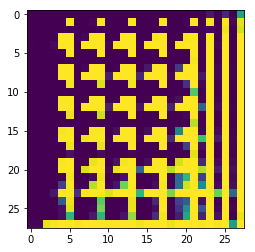

In [12]:
noise= np.random.normal(loc=0, scale=1, size=[100, 100])
dim=(10,10)
generated_images = G.predict(noise)
generated_images = generated_images.reshape(100,28,28)
generated_images.shape
# plt.figure(figsize=(10,10))
# for i in range(generated_images.shape[0]):
#     plt.subplot(dim[0], dim[1], i+1)
#     plt.imshow(generated_images[i], interpolation='nearest')
#     plt.axis('off')
# plt.tight_layout()
plt.imshow(generated_images[5])
# plt.imshow(generated_images)

In [27]:
from keras.datasets import mnist
generator = generator()
batch_size = 256
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# images_train = x_y
noise = np.random.uniform(-1.0, 1.0, size=[batch_size, 100])
images_fake = generator.predict(noise)
x = np.concatenate((images_train, images_fake))
y = np.ones([2*batch_size, 1])
y[batch_size:, :] = 0
d_loss = discriminator.train_on_batch(x, y)
y = np.ones([batch_size, 1])
noise = np.random.uniform(-1.0, 1.0, size=[batch_size, 100])


TypeError: __call__() missing 1 required positional argument: 'inputs'

In [5]:
!nvidia-smi

Thu Apr 25 09:54:02 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 410.79       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           On   | 000055EC:00:00.0 Off |                    0 |
| N/A   45C    P0    70W / 149W |  10877MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [18]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
batch_size = 256
x_train.shape[0]
# images_train = x_train[np.random.randint(0,x_train.shape[0], size=batch_size), :, :, :]
images_train = []
nums = np.random.randint(0,x_train.shape[0], size=batch_size)
# images_train.append(nums)
# images_train = np.array(images_train)

for num in nums:
    images_train.append(x_train[num])

images_train = np.array(images_train)
noise = np.random.uniform(-1.0, 1.0, size=[batch_size, 100])
# noise.shape
gen = generator()
images_fake = gen.predict(noise)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 12544)             1266944   
_________________________________________________________________
batch_normalization_13 (Batc (None, 12544)             50176     
_________________________________________________________________
activation_16 (Activation)   (None, 12544)             0         
_________________________________________________________________
reshape_4 (Reshape)          (None, 7, 7, 256)         0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 7, 7, 256)         0         
_________________________________________________________________
up_sampling2d_7 (UpSampling2 (None, 14, 14, 256)       0         
_________________________________________________________________
conv2d_transpose_13 (Conv2DT (None, 14, 14, 128)       819328    
__________

In [58]:
# inp = np.concatenate((images_train, images_fake))

images_train = images_train.reshape(256,28,28,1)

inp = np.concatenate((images_train, images_fake))
target = np.ones([2*batch_size, 1])
# target = [batch_size:, :] = 0
inp.shape

(512, 28, 28, 1)

In [92]:
import keras
# disc = discriminator()


target [batch_size:, :] = 0
# input = np.asarray(input)
# disc.compile(loss='binary_crossentropy', optimizer=keras.optimizers.RMSprop(lr=0.0008, clipvalue=1.0, decay=6e-8),\
#             metrics=['accuracy'])
# input.shape
# for i in range(0,10):
disc.fit(inp, target,batch_size = batch_size,epochs = 5)


Epoch 1/5
512/512 [==============================] - 0s 469us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 2/5
512/512 [==============================] - 0s 475us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 3/5
512/512 [==============================] - 0s 473us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 4/5
512/512 [==============================] - 0s 475us/step - loss: 1.0960e-07 - acc: 1.0000
Epoch 5/5
512/512 [==============================] - 0s 501us/step - loss: 1.0960e-07 - acc: 1.0000


In [105]:
newTarget = np.ones([batch_size, 1])
for i in range(0,80):
#     noise = np.random.uniform(-1.0, 1.0, size=[batch_size, 100])
#     AM.fit(noise, newTarget,batch_size = batch_size,epochs = 5)
#     disc.fit(inp, target,batch_size = batch_size,epochs = 5)
    disc.train_on_batch(inp,target)
    AM.train_on_batch(noise,newTarget)

array([[1.025485e-11]], dtype=float32)

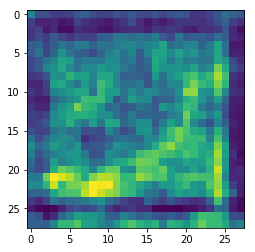

In [113]:
test = np.expand_dims(noise[1],axis=0)
res = gen.predict(test)
res = res.reshape(28,28)
plt.imshow(res)
# disc.predict(res)
# inp.shape
res = np.expand_dims(res,axis=0)
res = res.reshape(1,28,28,1)
disc.predict(res)